# Apropiación del Notebook de Hugo Peña

In [1]:
!pip install scikit-image watermark -q

# Install OpenCV package first
!pip install opencv-python -q

# First install the required system library
!apt-get update && apt-get install -y libgl1-mesa-glx

!pip install opencv-python


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Hit:1 http://deb.debian.org/debian bullseye InRelease
Hit:2 http://deb.debian.org/debian-security bullseye-security InRelease
Hit:3 http://deb.debian.org/debian bullseye-updates InRelease




libgl1-mesa-glx is already the newest version (20.3.5-1).
0 upgraded, 0 newly installed, 0 to remove and 53 not upgraded.

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import cv2
import random
import numpy as np
import urllib.request
import matplotlib.pyplot as plt

In [3]:
url = "https://i.pinimg.com/736x/85/82/26/8582269d8cfb6dda61d49a3d00090acf.jpg"
resp = urllib.request.urlopen(url)
imagen_np = np.asarray(bytearray(resp.read()), dtype=np.uint8)
imagen = cv2.imdecode(imagen_np, cv2.IMREAD_COLOR)

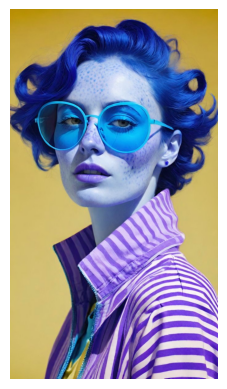

In [4]:
plt.axis("off")
plt.imshow(imagen)

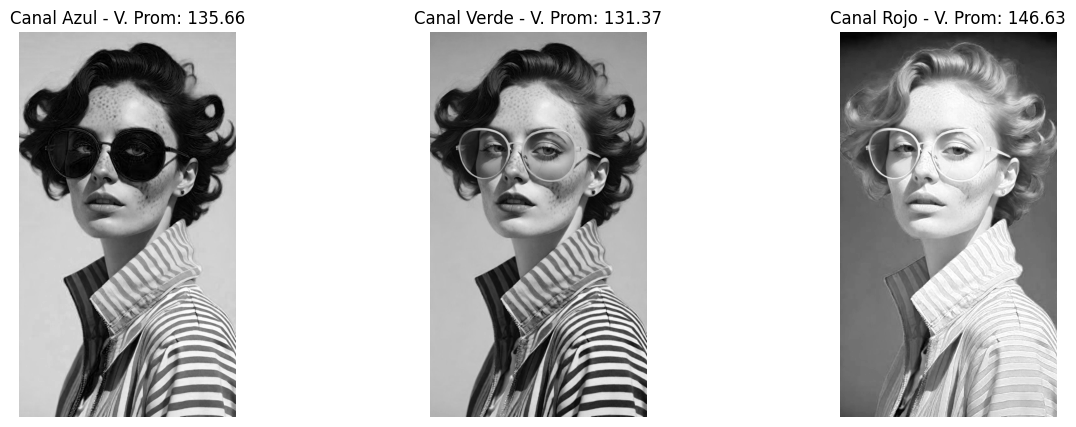

In [5]:
canal_azul = imagen[:,:,0]
canal_verde = imagen[:,:,1]
canal_rojo = imagen[:,:,2]

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(canal_azul, cmap='gray')
plt.title(f'Canal Azul - V. Prom: {canal_azul.mean():.2f}')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(canal_verde, cmap="gray")
plt.title(f'Canal Verde - V. Prom: {canal_verde.mean():.2f}')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(canal_rojo, cmap="gray")
plt.title(f'Canal Rojo - V. Prom: {canal_rojo.mean():.2f}')
plt.axis("off")

plt.show()

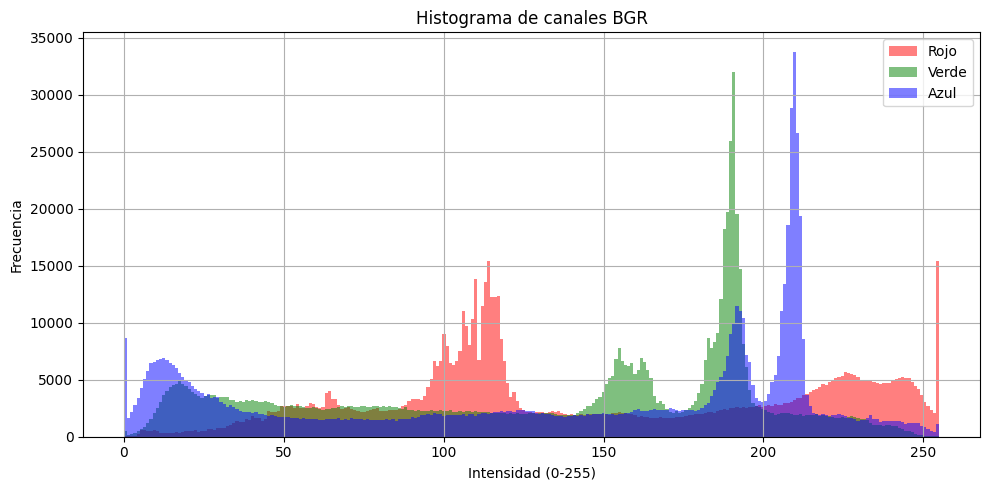

In [6]:
plt.figure(figsize=(10, 5))

plt.hist(canal_rojo.flatten(), bins=256, color='red', alpha=0.5, label='Rojo')
plt.hist(canal_verde.flatten(), bins=256, color='green', alpha=0.5, label='Verde')
plt.hist(canal_azul.flatten(), bins=256, color='blue', alpha=0.5, label='Azul')

plt.title('Histograma de canales BGR')
plt.xlabel('Intensidad (0-255)')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


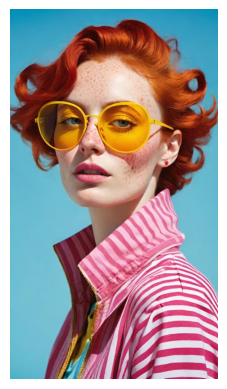

In [7]:
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(imagen_rgb)

## Ejercicio 1

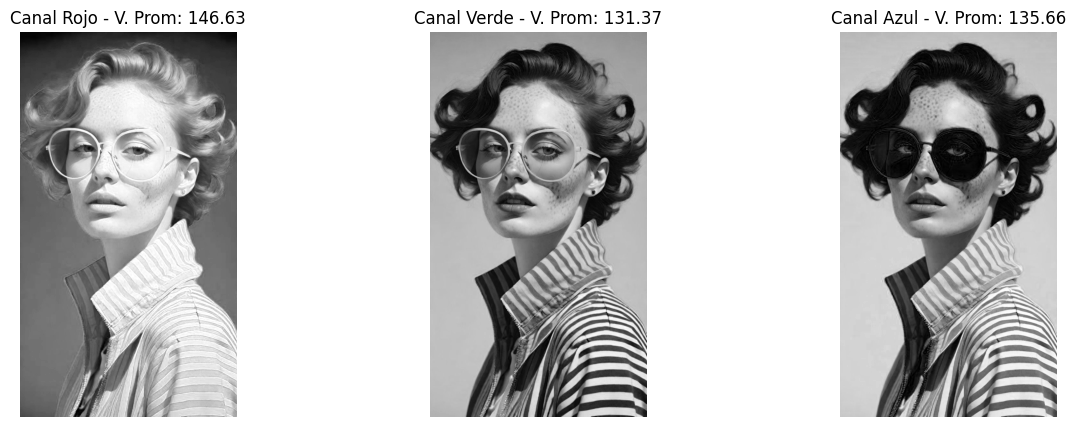

In [8]:
canal_rojo_rgb = imagen_rgb[:,:,0]
canal_verde_rgb = imagen_rgb[:,:,1]
canal_azul_rgb = imagen_rgb[:,:,2]

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(canal_rojo, cmap='gray')
plt.title(f'Canal Rojo - V. Prom: {canal_rojo.mean():.2f}')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(canal_verde, cmap="gray")
plt.title(f'Canal Verde - V. Prom: {canal_verde.mean():.2f}')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(canal_azul, cmap="gray")
plt.title(f'Canal Azul - V. Prom: {canal_azul.mean():.2f}')
plt.axis("off")

plt.show()

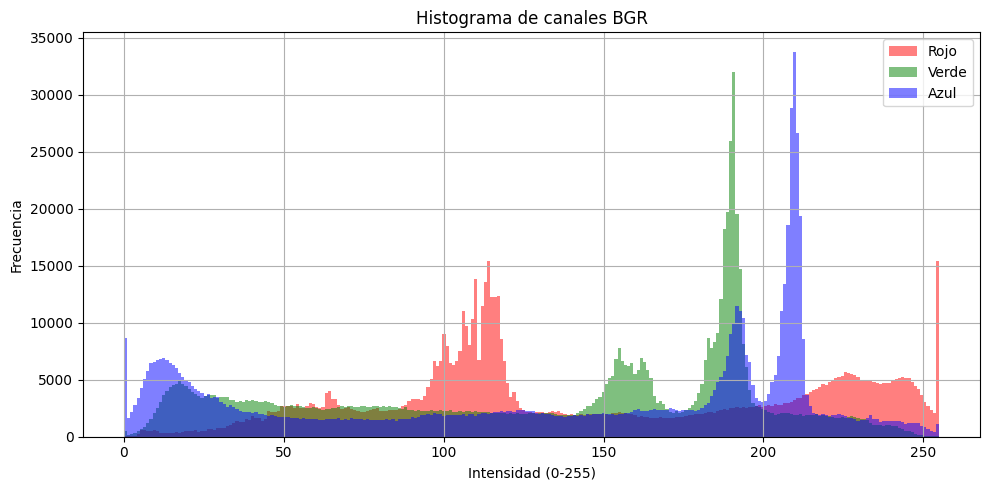

In [9]:
plt.figure(figsize=(10, 5))

plt.hist(canal_rojo_rgb.flatten(), bins=256, color='red', alpha=0.5, label='Rojo')
plt.hist(canal_verde_rgb.flatten(), bins=256, color='green', alpha=0.5, label='Verde')
plt.hist(canal_azul_rgb.flatten(), bins=256, color='blue', alpha=0.5, label='Azul')

plt.title('Histograma de canales BGR')
plt.xlabel('Intensidad (0-255)')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Me surge una hipótesis, si hay alguna manera de que yo (sin saber si la imagen esta en BGR o RGB) puediera darme cuenta realmente cual es el canal correspondiente, ya que si no conociera la foto o los elementos que hay adentro, es solo una cuestión de asignación de colores.

## Ejercicio 2

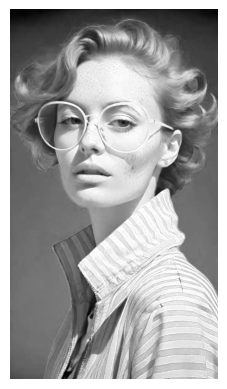

In [10]:
imagen_rojo = canal_rojo_rgb
plt.axis('off')
plt.imshow(imagen_rojo, cmap='gray')

Tamaño original 1200x675 pixels


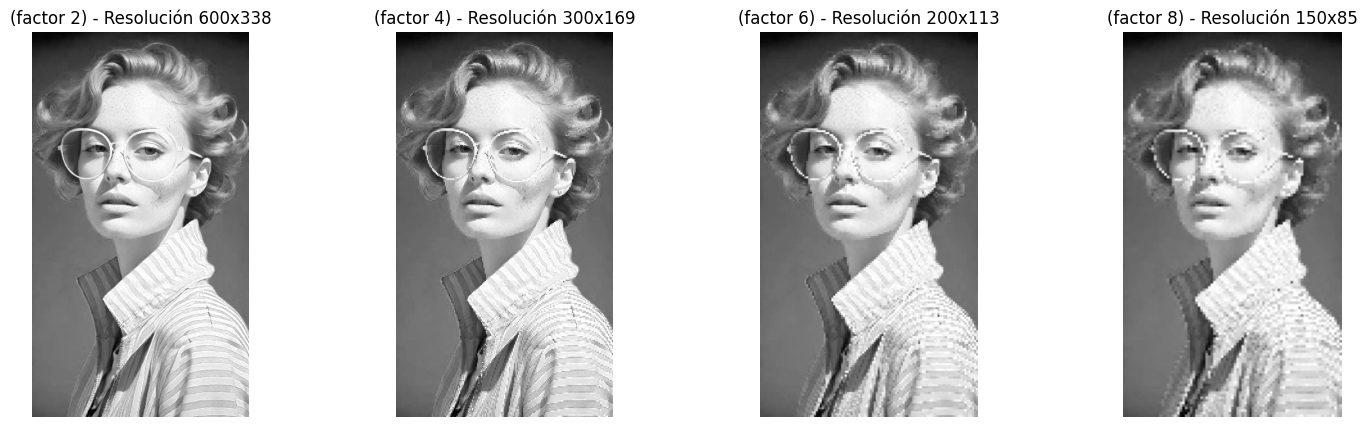

In [11]:
plt.figure(figsize=(18, 5))
factores_muestreo = [2, 4, 6, 8]
filas, columnas = imagen_rojo.shape
for k, factor_muestreo in enumerate(factores_muestreo):
    rango_filas = range(0, filas, factor_muestreo)
    rango_columnas = range(0, columnas, factor_muestreo)
    cantidad_resultante_filas = len(rango_filas)
    cantidad_resultante_columnas = len(rango_columnas)
    nueva_imagen = np.zeros((cantidad_resultante_filas, cantidad_resultante_columnas), np.uint8)
    for i in range(cantidad_resultante_filas):
        for j in range(cantidad_resultante_columnas):
            nueva_imagen[i, j] = imagen_rojo[rango_filas[i], rango_columnas[j]]
    plt.subplot(1, 4, k + 1)
    plt.axis('off')
    plt.title(f'(factor {factor_muestreo}) - Resolución {cantidad_resultante_filas}x{cantidad_resultante_columnas}')
    plt.imshow(nueva_imagen, cmap="gray")
print(f'Tamaño original {filas}x{columnas} pixels')
plt.show()

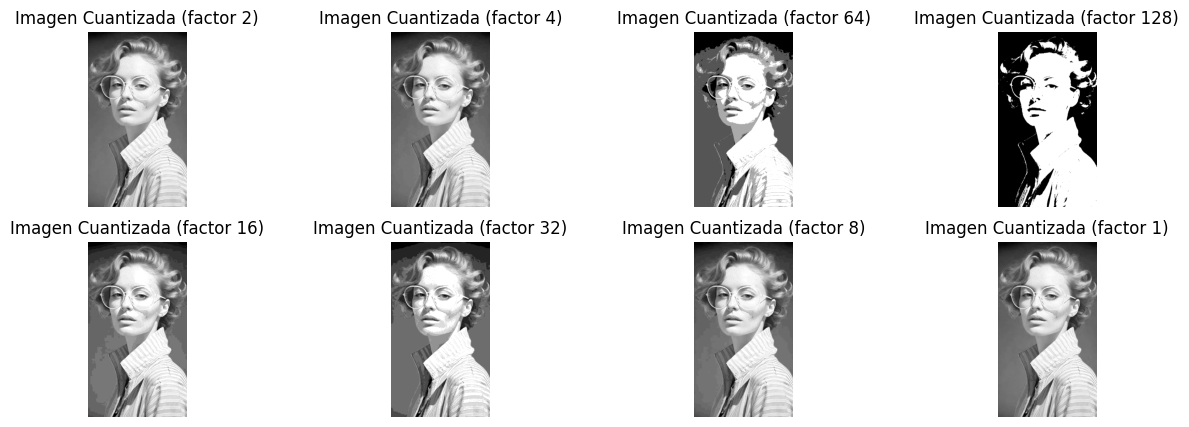

In [12]:
import random
factores_cuanti = []
while len(factores_cuanti) < 8:
  factor = random.randint(1,255)
  if 256 % factor == 0 and factor not in factores_cuanti:
    factores_cuanti.append(factor)
imagenes_cuantizadas = []
plt.figure(figsize=(15, 5))
for i, j in enumerate(factores_cuanti):
  Z = np.floor(imagen_rojo / j) * j
  Z = Z.astype(np.uint8)
  imagenes_cuantizadas.append(Z)
  plt.subplot(2, 4, i + 1)
  plt.axis('off')
  plt.title(f'Imagen Cuantizada (factor {j})')
  plt.imshow(Z, cmap="gray")
  plt.axis('off')
plt.show()

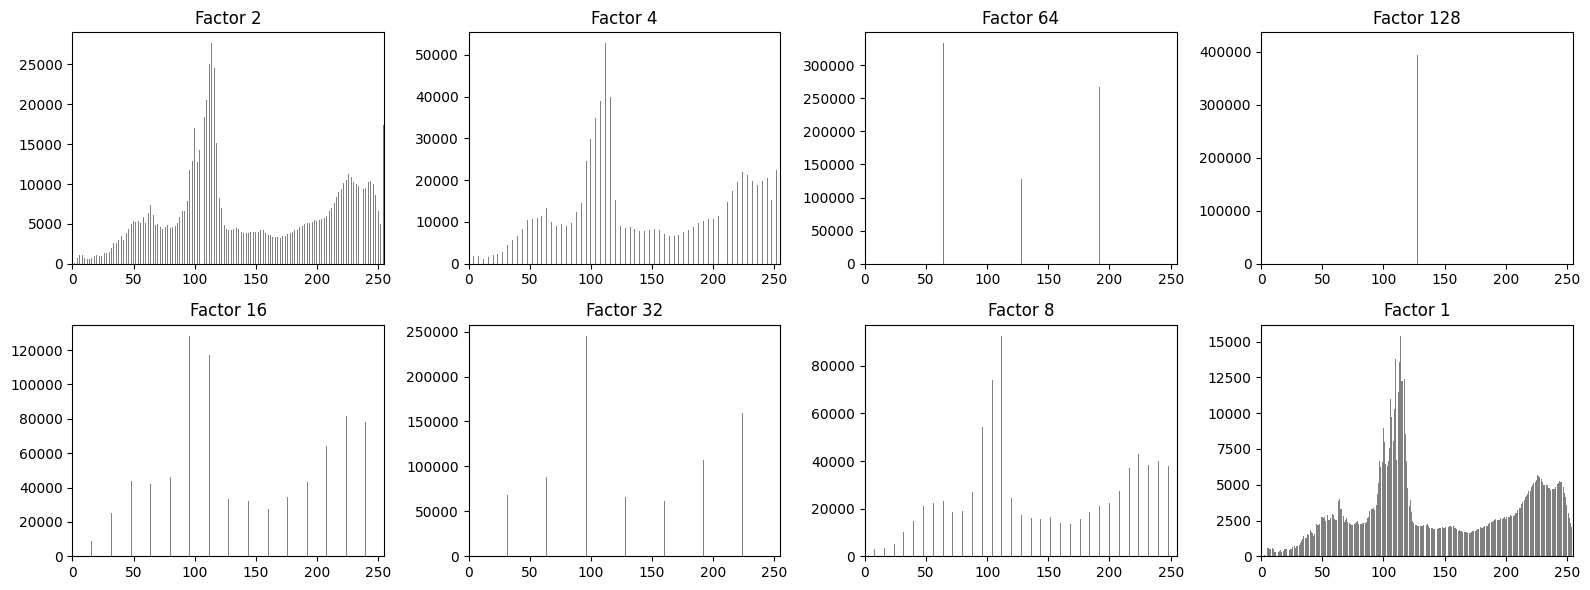

In [13]:
def hist(img):
    h = np.zeros(256)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            h[img[i, j]] += 1
    return h

plt.figure(figsize=(16, 6))
for i, img in enumerate(imagenes_cuantizadas):
    h = hist(img)
    plt.subplot(2, 4, i + 1)
    plt.bar(np.arange(256), h, color='gray')
    plt.title(f'Factor {factores_cuanti[i]}')
    plt.xlim(0, 255)
    plt.tight_layout()

plt.show()


### Creo que en el factor 64 de la cuantización se empieza a hacer notorio algún efecto en la imagen.

## Ejercicio 3

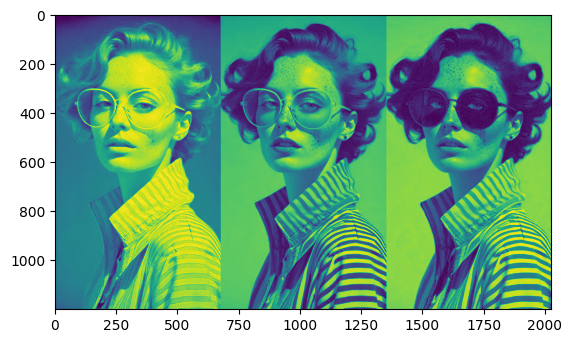

In [14]:
canales = np.concatenate((canal_rojo_rgb, canal_verde_rgb, canal_azul_rgb), axis=1)
plt.imshow(canales)

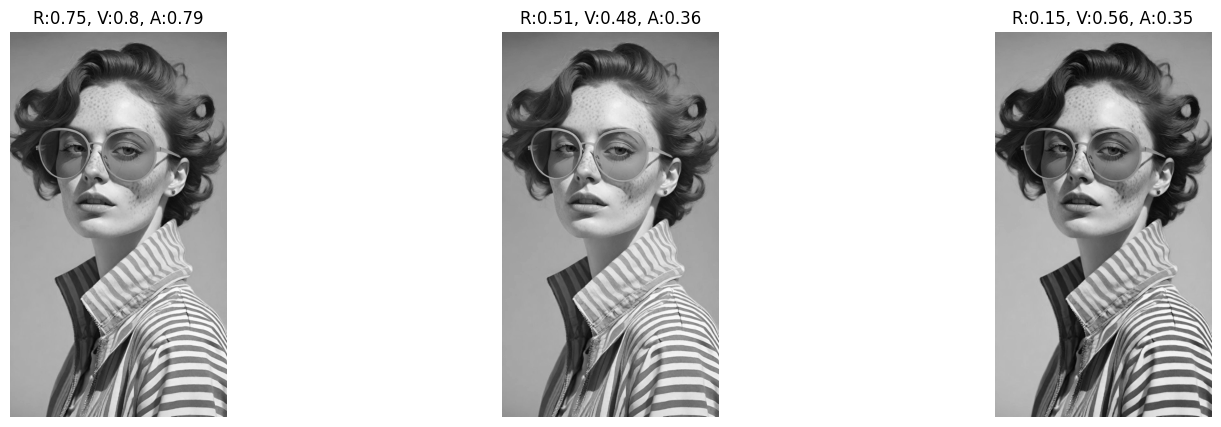

In [15]:
plt.figure(figsize=(18, 5))
for i in range(3):
  rojo_f = canal_rojo_rgb.astype(float)
  verde_f = canal_verde_rgb.astype(float)
  azul_f = canal_azul_rgb.astype(float)
  peso = (round(np.random.rand(),2), round(np.random.rand(),2), round(np.random.rand(),2))
  gris_f = peso[0]*rojo_f + peso[1]*verde_f + peso[2]*azul_f
  gris = gris_f.astype(int)
  plt.subplot(1, 3, i + 1)
  plt.axis('off')
  plt.title(f'R:{peso[0]}, V:{peso[1]}, A:{peso[2]}')
  plt.imshow(gris, cmap="gray")
plt.show()

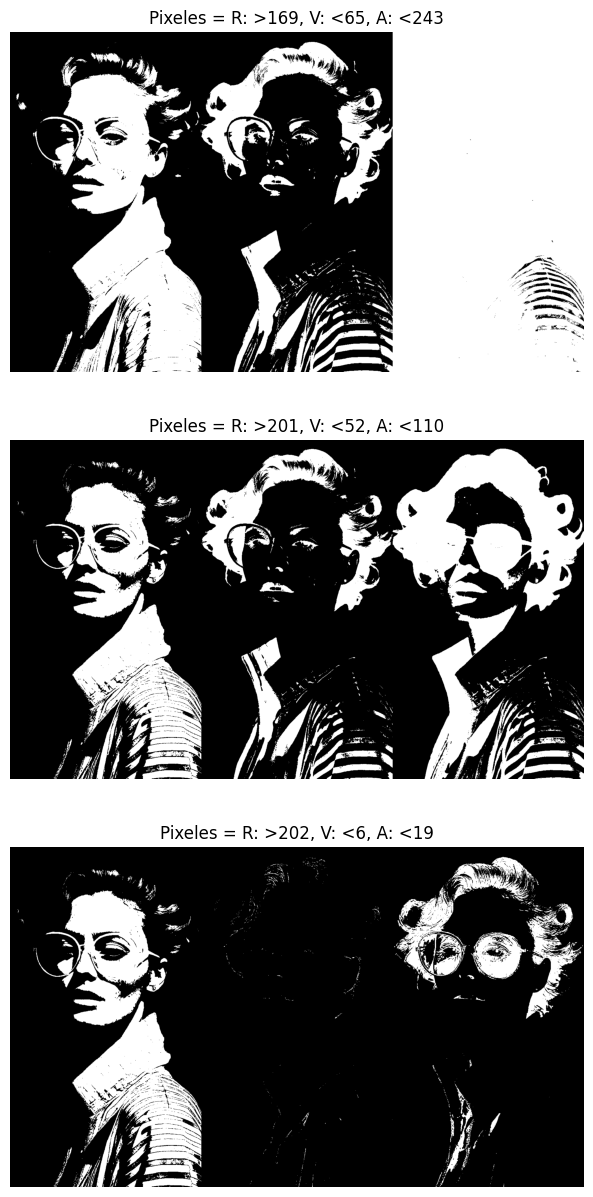

In [16]:
plt.figure(figsize=(25, 15))
for i in range(3):
  aleatorio1 = random.randint(0, 255)
  aleatorio2 = random.randint(0, 255)
  aleatorio3 = random.randint(0, 255)
  seg_r = canal_rojo_rgb > aleatorio1
  seg_v = canal_verde_rgb < aleatorio2
  seg_a = canal_azul_rgb < aleatorio3
  seg_rgb = np.concatenate((seg_r,seg_v,seg_a), axis=1)
  plt.subplot(3, 1, i + 1)
  plt.axis('off')
  plt.title(f'Pixeles = R: >{aleatorio1}, V: <{aleatorio2}, A: <{aleatorio3}')
  plt.imshow(seg_rgb, cmap="gray")
plt.show()

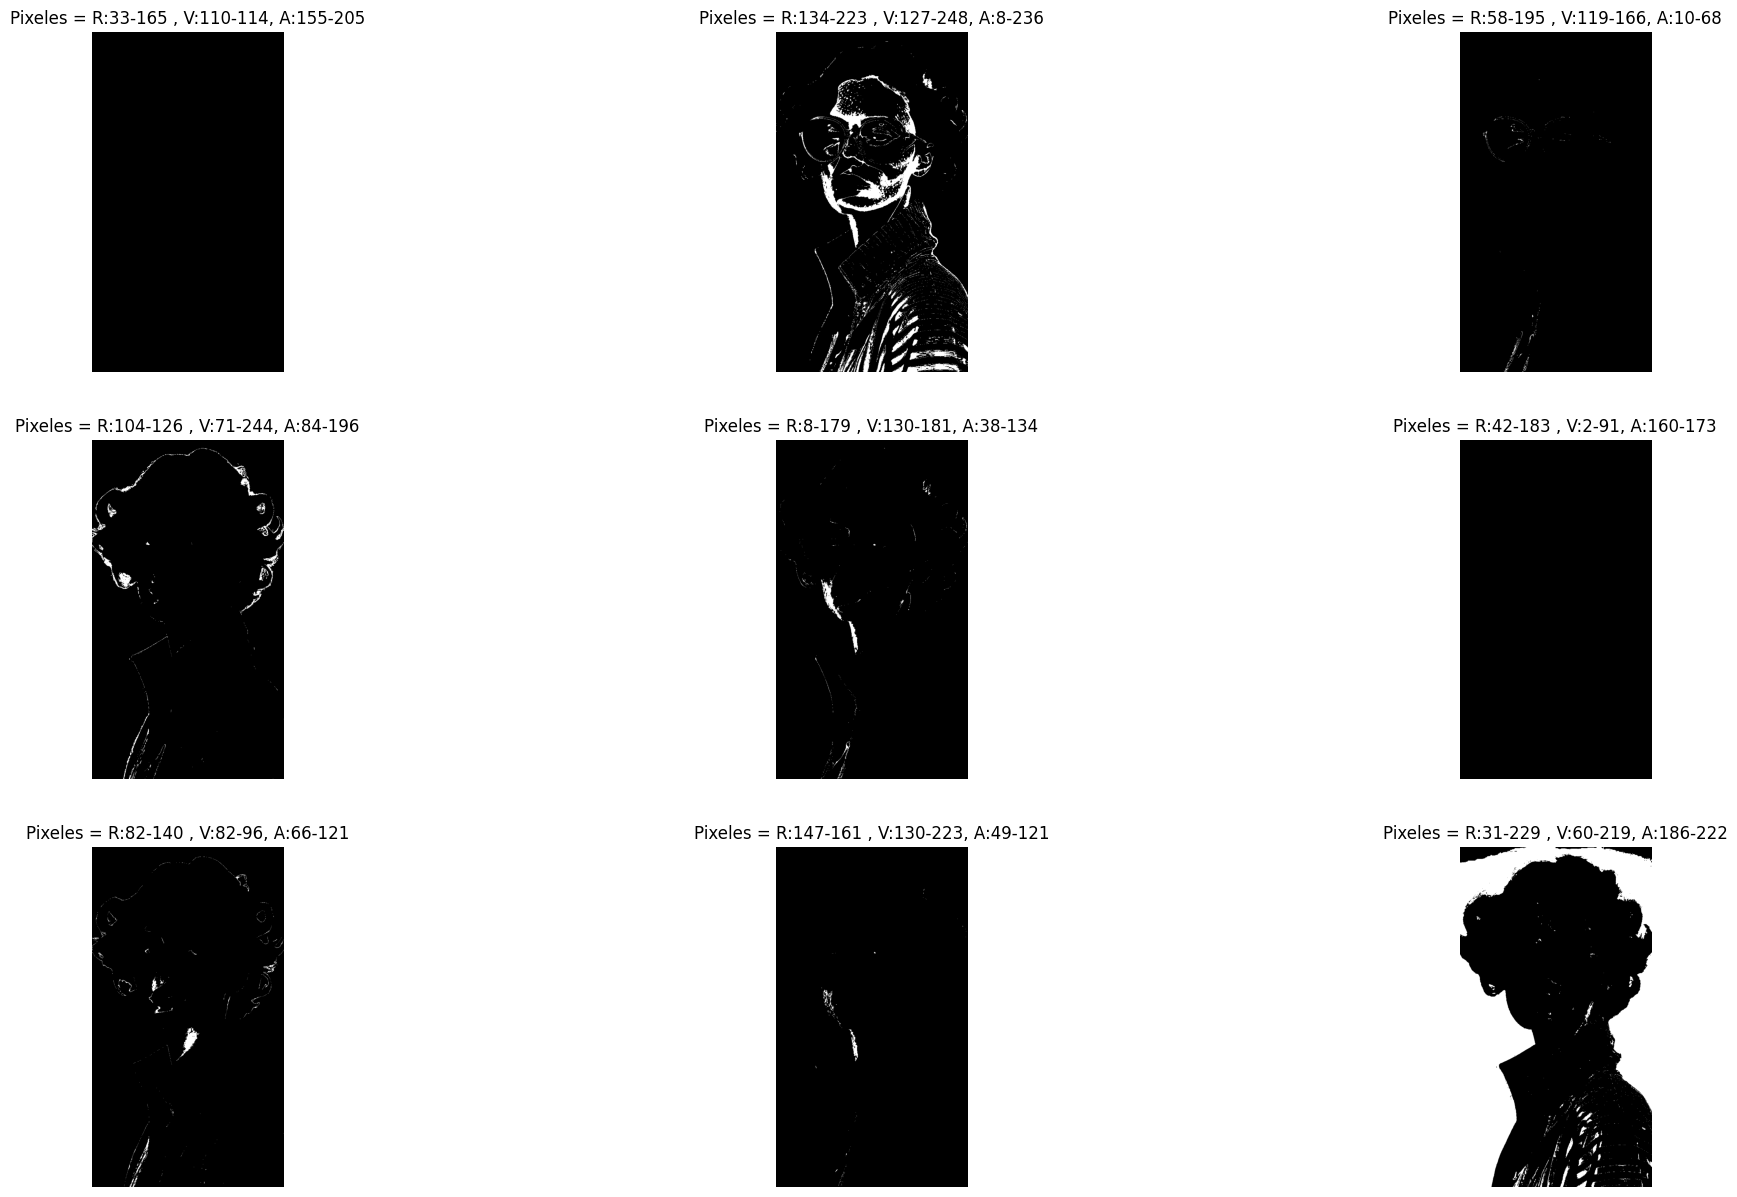

In [17]:
plt.figure(figsize=(25, 15))
for i in range(9):
  r_min, r_max = sorted([random.randint(0, 255), random.randint(0, 255)])
  v_min, v_max = sorted([random.randint(0, 255), random.randint(0, 255)])
  a_min, a_max = sorted([random.randint(0, 255), random.randint(0, 255)])
  seg_r = (canal_rojo_rgb >= r_min) & (canal_rojo_rgb <= r_max)
  seg_v = (canal_verde_rgb >= v_min) & (canal_verde_rgb <= v_max)
  seg_a = (canal_azul_rgb >= a_min) & (canal_azul_rgb <= a_max)
  seg_rv = np.logical_and(seg_r,seg_v)
  seg = np.logical_and(seg_rv,seg_a)
  plt.subplot(3, 3, i + 1)
  plt.axis('off')
  plt.title(f'Pixeles = R:{r_min}-{r_max} , V:{v_min}-{v_max}, A:{a_min}-{a_max}')
  plt.imshow(seg, cmap="gray")
plt.show()

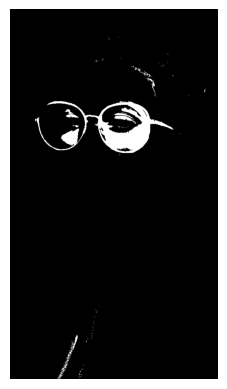

In [18]:
r_min, r_max = 173, 255
v_min, v_max = 121, 245
a_min, a_max = 0, 74
seg_r = (canal_rojo_rgb >= r_min) & (canal_rojo_rgb <= r_max)
seg_v = (canal_verde_rgb >= v_min) & (canal_verde_rgb <= v_max)
seg_a = (canal_azul_rgb >= a_min) & (canal_azul_rgb <= a_max)
seg_rv = np.logical_and(seg_r,seg_v)
seg_elegida = np.logical_and(seg_rv,seg_a)
plt.axis('off')
plt.imshow(seg_elegida, cmap='gray')

Si hubiera menos de tantos pixeles, los borraría.


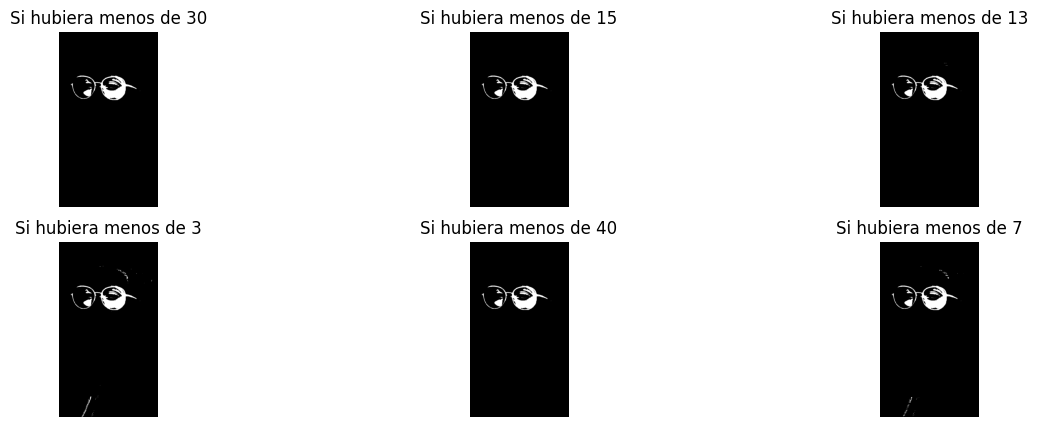

In [19]:
plt.figure(figsize=(15, 5))
for i in range(6):
  num_aleatorio = random.randint(1, 49)
  filas, columnas = seg_elegida.shape
  limpia = seg_elegida.copy()
  for j in range(filas):
      cantidad = np.sum(seg_elegida[j,:])
      if cantidad < num_aleatorio:
          limpia[j,:] = 0
  plt.subplot(2, 3, i + 1)
  plt.title(f'Si hubiera menos de {num_aleatorio}')
  plt.imshow(limpia, cmap='gray')
  plt.axis('off')
print('Si hubiera menos de tantos pixeles, los borraría.')
plt.show()

Notamos que entre más pixeles sueltos empieza a cortar más la imagen así que bajamos la aletoriedad.

Si hubiera menos de tantos pixeles, los borraría.


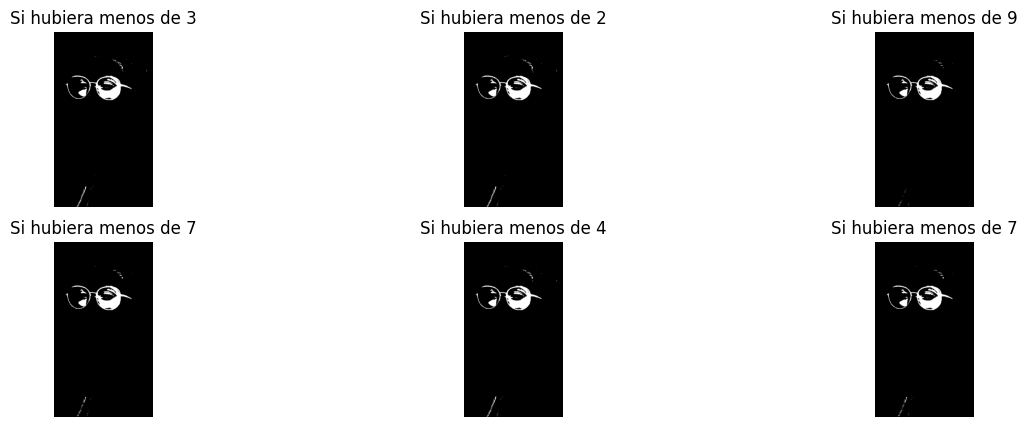

In [20]:
plt.figure(figsize=(15, 5))
for i in range(6):
  num_aleatorio = random.randint(1, 9) #bajamos la aletoriedad
  filas, columnas = seg_elegida.shape
  limpia = seg_elegida.copy()
  for j in range(filas):
      cantidad = np.sum(seg_elegida[j,:])
      if cantidad < num_aleatorio:
          limpia[j,:] = 0
  plt.subplot(2, 3, i + 1)
  plt.title(f'Si hubiera menos de {num_aleatorio}')
  plt.imshow(limpia, cmap='gray')
  plt.axis('off')
print('Si hubiera menos de tantos pixeles, los borraría.')
plt.show()

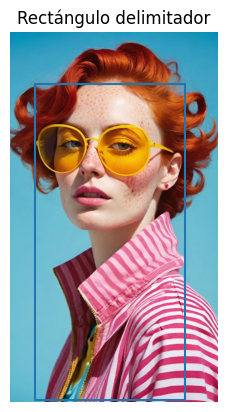

In [21]:
i_min = 1000
i_max = 0
j_min = 1000
j_max = 0
for i in range(filas):
    for j in range(columnas):
        if limpia[i,j]>0:
            if i<i_min: i_min = i
            if i>i_max: i_max = i
            if j<j_min: j_min = j
            if j>j_max: j_max = j

y = [i_min,i_min,i_max,i_max,i_min]
x = [j_min,j_max,j_max,j_min,j_min]
plt.imshow(imagen_rgb)
plt.plot(x,y)
plt.axis('off')
plt.title('Rectángulo delimitador')
plt.show()

(-0.5, 674.5, 1199.5, -0.5)

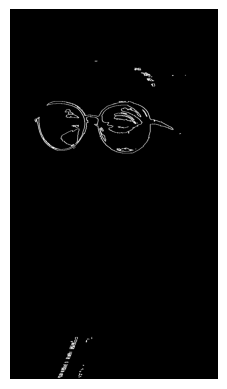

In [22]:
borde = np.zeros((filas,columnas),np.uint8)
for i in range(filas):
    for j in range(1,columnas):
        if limpia[i,j]!=limpia[i,j-1]:
            borde[i,j] = 1
            borde[i,j-1] = 1

for i in range(1,filas):
    for j in range(columnas):
        if limpia[i-1,j]!=limpia[i,j]:
            borde[i,j] = 1
            borde[i,j-1] = 1
plt.imshow(borde, cmap='gray')
plt.axis('off')

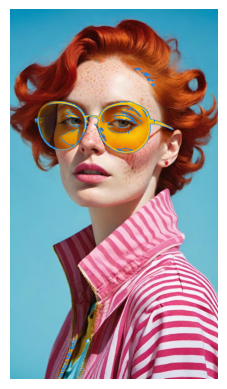

In [23]:
img_final = imagen_rgb.copy()
for i in range(filas):
    for j in range(columnas):
        if borde[i,j]==1:
            img_final[i,j,:] = [0,130,255]
plt.axis('off')
plt.imshow(img_final)

### Hasta acá fué todo experimentación.. Ahora me enojé..

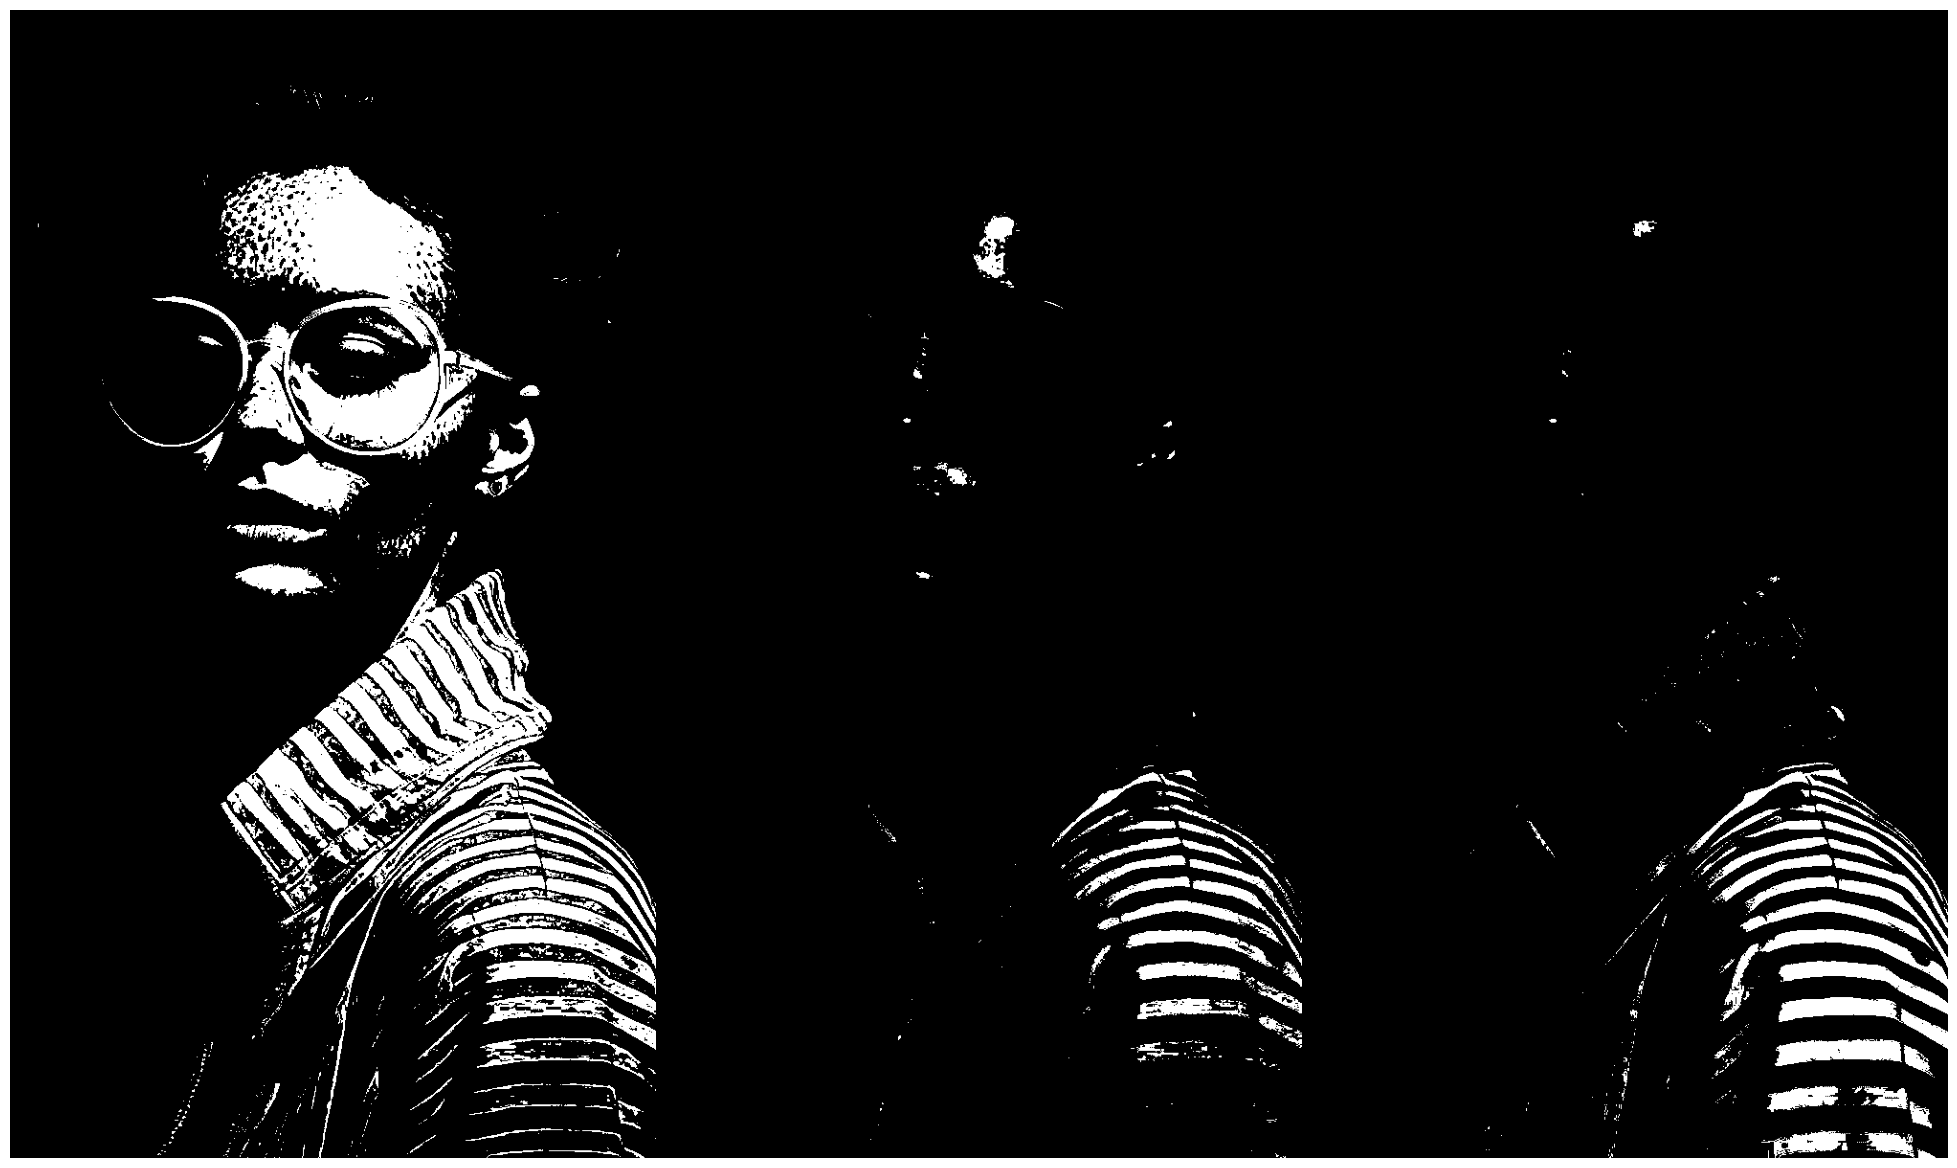

In [24]:
plt.figure(figsize=(25, 15))
seg_r = canal_rojo_rgb > 230
seg_v = canal_verde_rgb > 230
seg_a = canal_azul_rgb > 230
seg_rgb = np.concatenate((seg_r,seg_v,seg_a), axis=1)
plt.axis('off')
plt.imshow(seg_rgb, cmap="gray")

### Estoy tratando de capturar los brillos que son los que me imposibilitan segmentar bien, alguna fruta en particular

(-0.5, 674.5, 1199.5, -0.5)

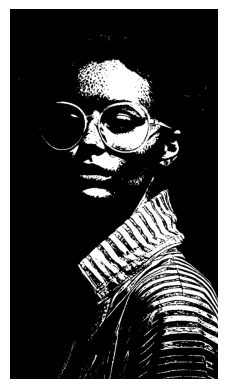

In [25]:
plt.imshow(seg_r, cmap='gray')
plt.axis('off')

### Lo que hago acá es usar una de las segmentaciones por canal que haya detectado brillos como mascara para repintar pixeles usando cv2.inpaint().

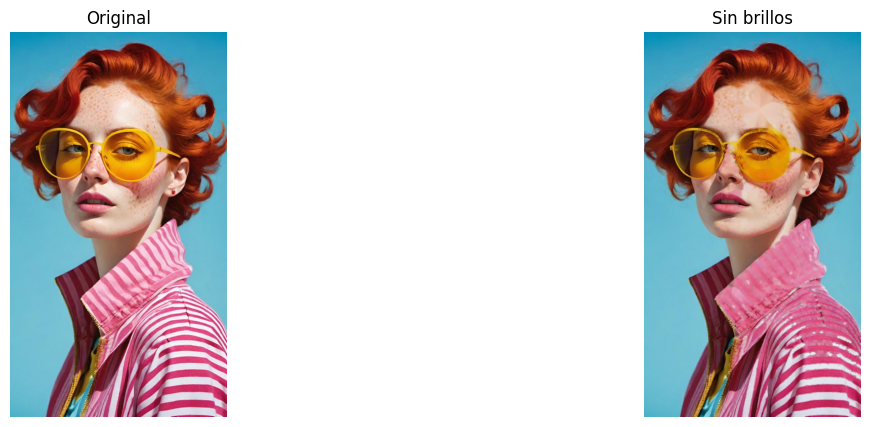

In [26]:
seg_r = seg_r.astype(np.uint8) * 255
img_sinbrillo = cv2.inpaint(imagen_rgb, seg_r, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(imagen_rgb)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Sin brillos")
plt.imshow(img_sinbrillo)
plt.axis("off")
plt.show()


### Vuelvo a separar en canales para repetir el proceso y ver si puedo capturar más brillos

In [27]:
canal_rojo_rgb = img_sinbrillo[:,:,0]
canal_verde_rgb = img_sinbrillo[:,:,1]
canal_azul_rgb = img_sinbrillo[:,:,2]

### Vuelvo a cargar la imagen con los ejes de referencia para elegir el pixel

(-0.5, 674.5, 1199.5, -0.5)

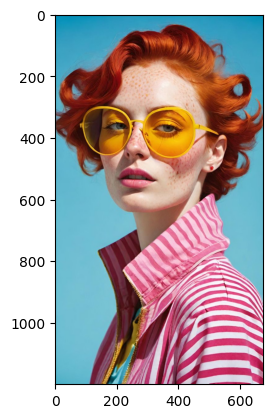

In [28]:
plt.imshow(imagen_rgb)
plt.axis("on") # para que no aparezcan los ejes

### Elección del pixel claro

In [29]:
pixel_taza = imagen_rgb[370,450]  #elijo el pixel de la fila 370 columna 450

print(pixel_taza) # miro los tonos RGB de ese pixel 

rojo_del_pixel_taza=print("Rojo: "+str(pixel_taza[0]))
verde_del_pixel_taza=print("Verde: "+str(pixel_taza[1]))
azul_del_pixel_taza=print("Azul: "+str(pixel_taza[2]))

[235 183  12]
Rojo: 235
Verde: 183
Azul: 12


### Muestra el color del pixel claro

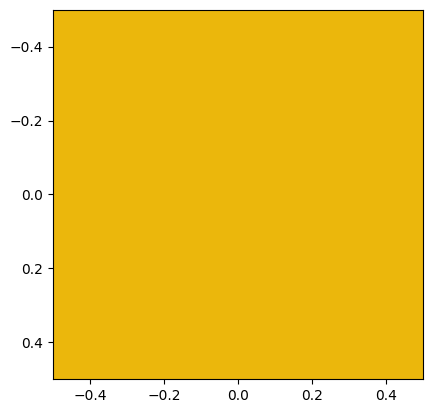

In [30]:
ver_pixel_taza = np.array([[pixel_taza]], dtype=np.uint8) #convierto a array para poder graficarlo con matplotlib
plt.imshow(ver_pixel_taza) #veo el pixel elegido

### Definición de rangos para obtener los tonos parecidos al pixel seleccionado

In [31]:
x = 52 #le pongo esta variable ajustable asi puedo jugar con los rangos

rojo_del_pixel_taza = int(pixel_taza[0])
verde_del_pixel_taza = int(pixel_taza[1])
azul_del_pixel_taza = int(pixel_taza[2])

r_min, r_max = np.clip(rojo_del_pixel_taza - x, 0, 255), np.clip(rojo_del_pixel_taza + x, 0, 255)
g_min, g_max = np.clip(verde_del_pixel_taza - x, 0,255), np.clip(verde_del_pixel_taza + x, 0, 255)
b_min, b_max = np.clip(azul_del_pixel_taza - x, 0, 255), np.clip(azul_del_pixel_taza + x, 0, 255)

print("Rangos definidos a partir del color de la taza/ del píxel y el valor x =", x)
print(f"Rojo:   entre {r_min} y {r_max}")
print(f"Verde:  entre {g_min} y {g_max}")
print(f"Azul:   entre {b_min} y {b_max}")

Rangos definidos a partir del color de la taza/ del píxel y el valor x = 52
Rojo:   entre 183 y 255
Verde:  entre 131 y 235
Azul:   entre 0 y 64


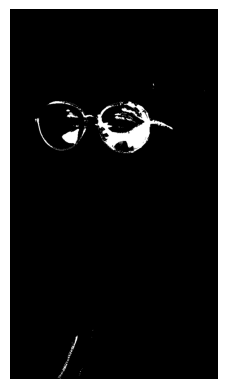

In [32]:
r_min, r_max = 183, 255
v_min, v_max = 131, 235
a_min, a_max = 0, 64
seg_r = (canal_rojo_rgb >= r_min) & (canal_rojo_rgb <= r_max)
seg_v = (canal_verde_rgb >= v_min) & (canal_verde_rgb <= v_max)
seg_a = (canal_azul_rgb >= a_min) & (canal_azul_rgb <= a_max)
seg_rv = np.logical_and(seg_r,seg_v)
seg_elegida = np.logical_and(seg_rv,seg_a)
plt.axis('off')
plt.imshow(seg_elegida, cmap='gray')

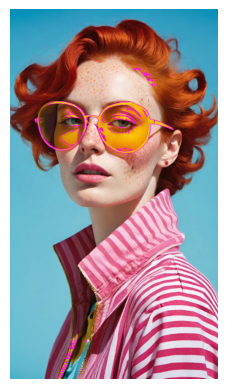

In [33]:
imagen_trf = imagen_rgb.copy()
for i in range(filas):
    for j in range(columnas):
        if borde[i,j]==1:
            imagen_trf[i,j,:] = [255,0,255]
plt.axis('off')
plt.imshow(imagen_trf)

### Vuelvo a aplicar el proceso de repintado.

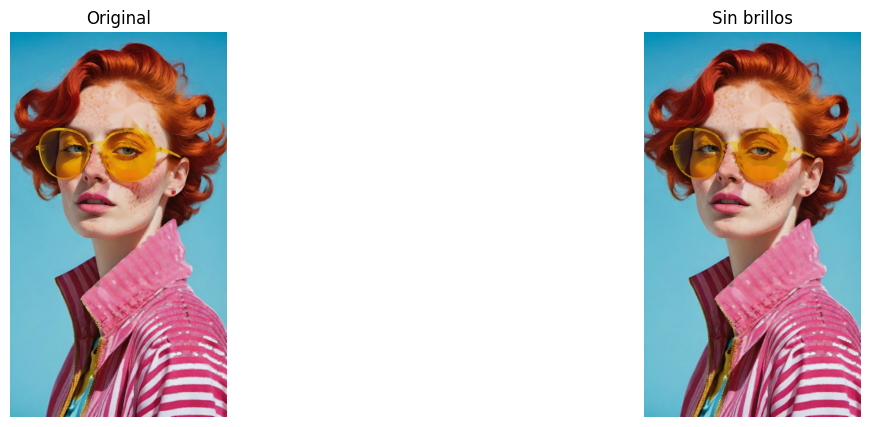

In [34]:
seg_elegida = seg_elegida.astype(np.uint8) * 255
img_sinbrillo2 = cv2.inpaint(img_sinbrillo, seg_elegida, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(img_sinbrillo)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Sin brillos")
plt.imshow(img_sinbrillo2)
plt.axis("off")
plt.show()

### Vuelvo a separar en canales, para repetir el proceso si huciera falta.

In [35]:
canal_rojo_rgb = img_sinbrillo2[:,:,0]
canal_verde_rgb = img_sinbrillo2[:,:,1]
canal_azul_rgb = img_sinbrillo2[:,:,2]

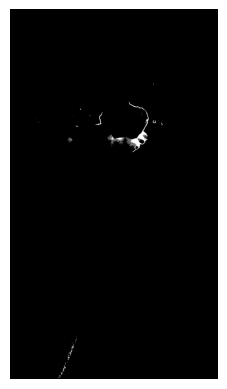

In [36]:
r_min, r_max = 183, 255
v_min, v_max = 131, 235
a_min, a_max = 0, 64
seg_r = (canal_rojo_rgb >= r_min) & (canal_rojo_rgb <= r_max)
seg_v = (canal_verde_rgb >= v_min) & (canal_verde_rgb <= v_max)
seg_a = (canal_azul_rgb >= a_min) & (canal_azul_rgb <= a_max)
seg_rv = np.logical_and(seg_r,seg_v)
seg_elegida = np.logical_and(seg_rv,seg_a)
plt.axis('off')
plt.imshow(seg_elegida, cmap='gray')

### Quedo medianamente conforme y además no me da más el horario ni la vista.

(-0.5, 674.5, 1199.5, -0.5)

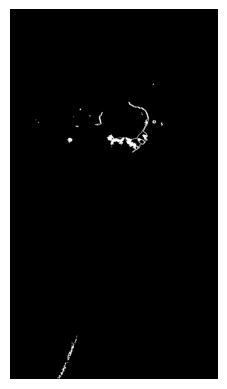

In [37]:
limpia = seg_elegida.copy()
borde = np.zeros((filas,columnas),np.uint8)
for i in range(filas):
    for j in range(1,columnas):
        if limpia[i,j]!=limpia[i,j-1]:
            borde[i,j] = 1
            borde[i,j-1] = 1

for i in range(1,filas):
    for j in range(columnas):
        if limpia[i-1,j]!=limpia[i,j]:
            borde[i,j] = 1
            borde[i,j-1] = 1
plt.imshow(borde, cmap='gray')
plt.axis('off')

### Una vez hecho el bordo, procedo a pintar el mismo sobre la foto original

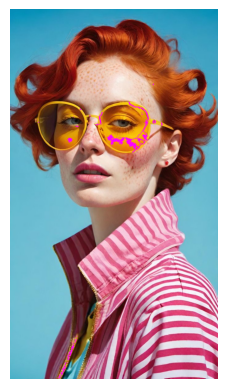

In [38]:
img_final2 = imagen_rgb.copy()
for i in range(filas):
    for j in range(columnas):
        if borde[i,j]==1:
            img_final2[i,j,:] = [255,0,255]
plt.axis('off')
plt.imshow(img_final2)

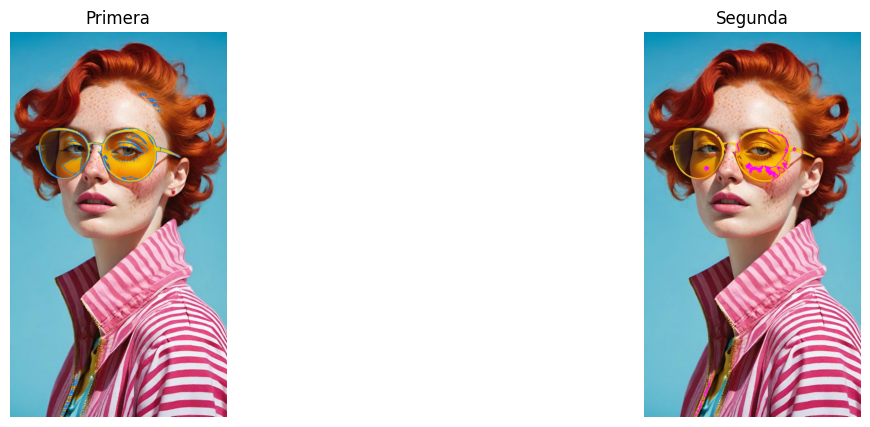

In [39]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title("Primera")
plt.imshow(img_final)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Segunda")
plt.imshow(img_final2)
plt.axis("off")
plt.show()

## Podemos observar que el resultado mejoró, creo que si sigo jugando con esto puedo lograrlo. Me gustó la actividad, me hizo desafiarme a mi mismo y estoy contento con el resultado, aunque falta.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9be9d3e5-4f25-48e6-912d-b59b8644d952' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>